# Portfolio Optimization

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_datareader.data as web

import datetime

start = datetime.datetime(2015, 1, 1)

end = datetime.datetime(2020, 1, 1)

C:\Users\91965\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [5]:
RIL = web.DataReader('RELIANCE.NS', 'yahoo', start, end)
ICICI = web.DataReader('ICICIBANK.NS', 'yahoo', start, end)
Glen = web.DataReader('GLENMARK.NS', 'yahoo', start, end)
Wipro = web.DataReader('WIPRO.NS', 'yahoo', start, end)

In [6]:
RIL = RIL['Adj Close']
ICICI = ICICI['Adj Close']
Glen = Glen['Adj Close']
Wipro = Wipro['Adj Close']

In [9]:
RIL = pd.DataFrame(RIL)
ICICI = pd.DataFrame(ICICI)
Glen = pd.DataFrame(Glen)
Wipro = pd.DataFrame(Wipro)

In [12]:
Glen.head()

,Adj Close
Date,
2015-01-01,763.140259
2015-01-02,755.612122
2015-01-05,739.424255
2015-01-06,710.246887
2015-01-07,708.180359


In [14]:
stocks = pd.concat([RIL,ICICI, Glen, Wipro], axis = 1)
stocks.columns = ['Reliance', 'ICICI', 'Glenmark', 'Wipro']

In [15]:
stocks.head()

,Reliance,ICICI,Glenmark,Wipro
Date,,,,
2015-01-01,415.367096,296.245026,763.140259,186.041550
2015-01-02,414.267700,304.654022,755.612122,187.692291
2015-01-05,409.729980,305.283905,739.424255,188.029068
2015-01-06,391.134613,292.334198,710.246887,183.633774
2015-01-07,399.648712,284.430267,708.180359,182.236313


In [16]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

Reliance    0.001179
ICICI       0.000677
Glenmark   -0.000442
Wipro       0.000320
dtype: float64

In [17]:
stocks.pct_change(1).corr()

,Reliance,ICICI,Glenmark,Wipro
Reliance,1.000000,0.286550,0.196887,0.148449
ICICI,0.286550,1.000000,0.210085,0.108714
Glenmark,0.196887,0.210085,1.000000,0.095728
Wipro,0.148449,0.108714,0.095728,1.000000


# Simulating Thousands of Possible Allocations

In [18]:
stocks.head()

,Reliance,ICICI,Glenmark,Wipro
Date,,,,
2015-01-01,415.367096,296.245026,763.140259,186.041550
2015-01-02,414.267700,304.654022,755.612122,187.692291
2015-01-05,409.729980,305.283905,739.424255,188.029068
2015-01-06,391.134613,292.334198,710.246887,183.633774
2015-01-07,399.648712,284.430267,708.180359,182.236313


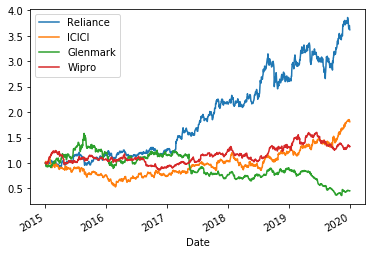

In [20]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot();

In [21]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,Reliance,ICICI,Glenmark,Wipro
Date,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,-0.002647,0.028385,-0.009865,0.008873
2015-01-05,-0.010954,0.002068,-0.021424,0.001794
2015-01-06,-0.045384,-0.042419,-0.039460,-0.023376
2015-01-07,0.021768,-0.027037,-0.002910,-0.007610


In [22]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,Reliance,ICICI,Glenmark,Wipro
Date,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,-0.002650,0.027990,-0.009914,0.008834
2015-01-05,-0.011014,0.002065,-0.021656,0.001793
2015-01-06,-0.046447,-0.043345,-0.040259,-0.023653
2015-01-07,0.021534,-0.027410,-0.002914,-0.007639


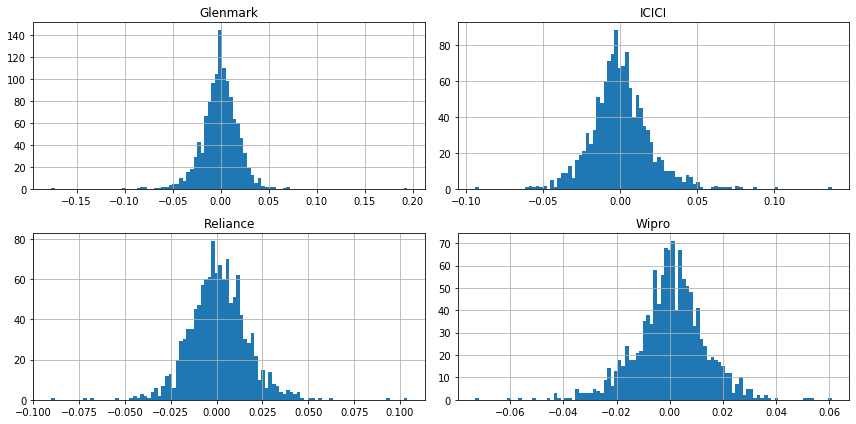

In [24]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout();

In [25]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Reliance,1228.0,0.001048,0.016173,-0.090306,-0.008600,0.000613,0.010755,0.104027
ICICI,1228.0,0.000484,0.019596,-0.093809,-0.010520,-0.000991,0.010818,0.137042
Glenmark,1228.0,-0.000645,0.020166,-0.176589,-0.010905,-0.000129,0.010664,0.194293
Wipro,1228.0,0.000230,0.013464,-0.073130,-0.006728,0.000507,0.007806,0.060898


In [26]:
log_ret.mean() * 252

Reliance    0.264044
ICICI       0.121967
Glenmark   -0.162501
Wipro       0.057915
dtype: float64

In [27]:
# Compute pairwise covariance of columns
log_ret.cov()

,Reliance,ICICI,Glenmark,Wipro
Reliance,0.000262,0.000092,0.000066,0.000033
ICICI,0.000092,0.000384,0.000085,0.000029
Glenmark,0.000066,0.000085,0.000407,0.000027
Wipro,0.000033,0.000029,0.000027,0.000181


In [28]:
log_ret.cov()*252 # multiply by days

,Reliance,ICICI,Glenmark,Wipro
Reliance,0.065918,0.023251,0.016555,0.008210
ICICI,0.023251,0.096766,0.021337,0.007271
Glenmark,0.016555,0.021337,0.102475,0.006682
Wipro,0.008210,0.007271,0.006682,0.045686


## Single Run for Some Random Allocation

In [29]:
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['Reliance', 'ICICI', 'Glenmark', 'Wipro'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.1641418850691243


Expected Volatility
0.2031214745725161


Sharpe Ratio
0.8080971517884696


In [30]:
# Now running random allocation 5000 times
num_ports = 5000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [31]:
sharpe_arr.max() # The maximum sharpe ratio from 5000 different allocations

1.0335022569337313

In [32]:
sharpe_arr.argmax() #Index position of that maximum sharpe ratio

1247

In [33]:
all_weights[1419,:] # Most optimal weights assigned to the stocks

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [34]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

## Plotting the data

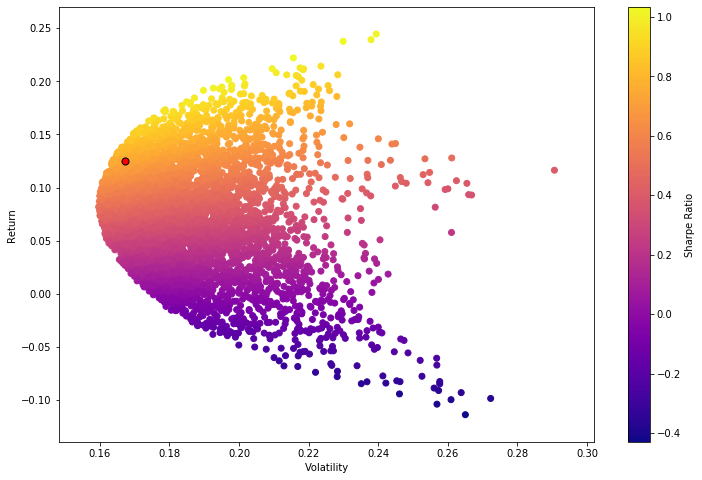

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black');

# Mathematical Optimization

There are much better ways to find good allocation weights than just guess and check! We can use optimization functions to find the ideal weights mathematically!

### Functionalize Return and SR operations

In [37]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [38]:
from scipy.optimize import minimize

In [39]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [40]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [41]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [42]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [43]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [44]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [45]:
opt_results

     fun: -1.0390286518667071
     jac: array([ 1.94579363e-04, -5.04344702e-04,  1.05770378e+00, -1.13424659e-03])
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.82193805, 0.06415216, 0.        , 0.11390978])

In [46]:
opt_results.x

array([0.82193805, 0.06415216, 0.        , 0.11390978])

In [47]:
get_ret_vol_sr(opt_results.x)

array([0.2314491 , 0.22275526, 1.03902865])

# All Optimal Portfolios (Efficient Frontier)

The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return.


In [48]:
# Our returns go from -0.15 to somewhere along 0.25
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(-0.15,0.25,100)

In [49]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [50]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

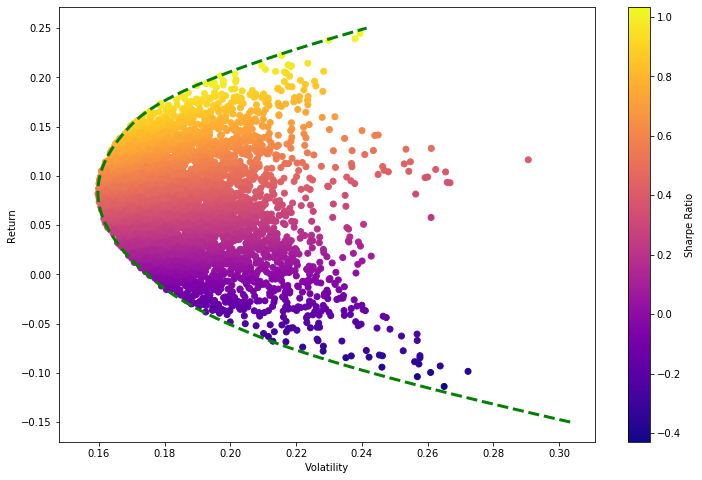

In [51]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3);

## Thank You!